<a href="https://colab.research.google.com/github/hamny88/Malaria-Cell-Stage-Classification/blob/master/CAP_5516_Medical_Image_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
os.chdir('/content/drive/MyDrive/Malaria')

Mounted at /content/drive


In [2]:
import cv2
import json

# Get the Dataset

In [ ]:
images_path = "/content/drive/MyDrive/Malaria/raw_image/"
annotation_path = "/content/drive/MyDrive/Malaria/scripts/annotations.json"
save_annotated_img_path = "/content/drive/MyDrive/Malaria/annotated"

In [ ]:
with open(annotation_path) as annotation_path:
    ground_truth = json.load(annotation_path)

for i in range(len(ground_truth)):
  single_image_ground_truth = ground_truth[i]
  print(i, "/", len(ground_truth))
  image_name = single_image_ground_truth['image_name']
  objects = single_image_ground_truth['objects']
  font = cv2.FONT_HERSHEY_SIMPLEX
  color = (0,0,0) # Green color
  image = cv2.imread(images_path + image_name)
  for bbox in objects:
    cell_type = bbox['type']
    if cell_type == 'red blood cell':
      cell_type = '' # omit the label in case of the healthy
    elif cell_type == 'ring':
      cell_type == 'ring'
    elif cell_type == 'gametocyte':
      cell_type == 'gametocyte'
    elif cell_type == 'trophozoite':
      cell_type == 'trophozoite'
  
    x = int(bbox['bbox']['x'])
    y = int(bbox['bbox']['y'])
    h = int(bbox['bbox']['h'])
    w = int(bbox['bbox']['w'])
    text_x, text_y = x, y - 10
    font_size = 0.5
    bbox_color = ''
    if cell_type == '':
      cv2.rectangle(image, (x, y), (x + w, y + h), (255,0,0), 5)
    else:
      cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 5)

    cv2.putText(image, cell_type, (text_x, text_y), font, font_size, color, 2)

  cv2.imwrite(os.path.join(save_annotated_img_path,image_name), image)

# Pre process the image 

Make the individual RBC 

In [ ]:
images_path = "/content/drive/MyDrive/Malaria/raw_image/"
annotation_path = "/content/drive/MyDrive/Malaria/scripts/annotations.json"
save_annotated_img_path = "/content/drive/MyDrive/Malaria/annotated"

with open(annotation_path) as annotation_path:
    ground_truth = json.load(annotation_path)
    
for i in range(len(ground_truth)):
  single_image_ground_truth = ground_truth[i]
  image_name = single_image_ground_truth['image_name']
  print(i,"/", len(ground_truth))
  objects = single_image_ground_truth['objects']
  image = cv2.imread(images_path + image_name)

  for i in range(len(objects)):
      obj = objects[i]
      cell_type = obj['type']

      if cell_type == 'red blood cell':
        x1 = int(obj['bbox']['x'])
        y1 = int(obj['bbox']['y'])
        h = int(obj['bbox']['h'])
        w = int(obj['bbox']['w'])

        x2,y2 = x1 + w, y1 + h

        # Crop ROI from image
        roi = image[y1:y2, x1:x2]

        #Save ROI as a new image
        path = '/content/drive/MyDrive/Malaria/overall/healthy'
        save_name = image_name + '_' + str(i) + '.JPG'
            
        cv2.imwrite(os.path.join(path,save_name), roi)

**Check the distribution**

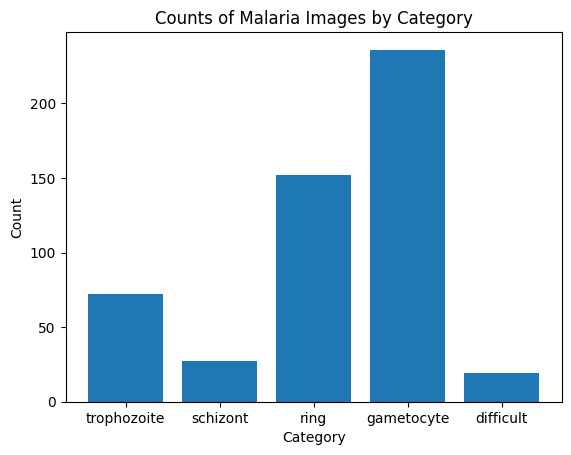

In [ ]:
import os
import matplotlib.pyplot as plt

# Define directory path
tro = '/content/drive/MyDrive/Malaria/Individual_RBC/trophozoite'
game = '/content/drive/MyDrive/Malaria/Individual_RBC/gametocyte'
difficult= '/content/drive/MyDrive/Malaria/Individual_RBC/difficult'
normal = '/content/drive/MyDrive/Malaria/Individual_RBC/red blood cell'
ring = '/content/drive/MyDrive/Malaria/Individual_RBC/ring'
schizont = '/content/drive/MyDrive/Malaria/Individual_RBC/schizont'

# Get list of files and count them
num_tro = len(os.listdir(tro))
num_normal = len(os.listdir(normal))
num_sch = len(os.listdir(schizont))
num_ring = len(os.listdir(ring))
num_game = len(os.listdir(game))
num_difficult = len(os.listdir(difficult))

# Define the data for the bar chart
categories = ['trophozoite', 'schizont', 'ring', 'gametocyte', 'difficult']
counts = [num_tro, num_sch, num_ring, num_game, num_difficult]

# Create the bar chart
plt.bar(categories, counts)

# Set the title and labels
plt.title('Counts of Malaria Images by Category')
plt.xlabel('Category')
plt.ylabel('Count')

# Display the chart
plt.show()

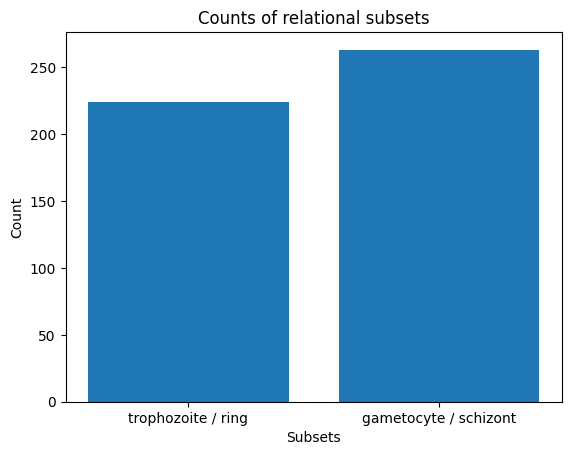

In [ ]:
# New 
# Define directory path
tro = '/content/drive/MyDrive/Malaria/Individual_RBC/trophozoite'
game = '/content/drive/MyDrive/Malaria/Individual_RBC/gametocyte'
ring = '/content/drive/MyDrive/Malaria/Individual_RBC/ring'
schizont = '/content/drive/MyDrive/Malaria/Individual_RBC/schizont'

# Get list of files and count them
num_tro = len(os.listdir(tro))
num_sch = len(os.listdir(schizont))
num_ring = len(os.listdir(ring))
num_game = len(os.listdir(game))

# Define the data for the bar chart
categories = ['trophozoite / ring', 'gametocyte / schizont']
counts = [num_tro + num_ring, num_sch + num_game]

# Create the bar chart
plt.bar(categories, counts)

# Set the title and labels
plt.title('Counts of relational subsets')
plt.xlabel('Subsets')
plt.ylabel('Count')

# Display the chart
plt.show()

# Make the Dataset 

training 70%, testing 20%, validation 10% 

In [ ]:
import os
import random
import shutil
from sklearn.model_selection import train_test_split


In [ ]:


# Dataset path
tro = '/content/drive/MyDrive/Malaria/Individual_RBC/trophozoite'
game = '/content/drive/MyDrive/Malaria/Individual_RBC/gametocyte'
ring = '/content/drive/MyDrive/Malaria/Individual_RBC/ring'
schizont = '/content/drive/MyDrive/Malaria/Individual_RBC/schizont'
normal =  '/content/drive/MyDrive/Malaria/Individual_RBC/red_blood_cell'
difficult = '/content/drive/MyDrive/Malaria/Individual_RBC/difficult'

dataset_path = [tro,game,ring,schizont,normal,difficult]

# Set the paths to your dataset and output directories
train_path = 'train'
test_path = 'test'
val_path = 'val'

# Set the percentage split for training, testing, and validation
train_split = 0.7
test_split = 0.2
val_split = 0.1

for data in dataset_path:
  print(data)
  d_path = data
  image_files = [f for f in os.listdir(data) if f.endswith('.JPG')]
  random.shuffle(image_files)
  num_images = len(image_files)
  print("Num images", num_images)
  num_train = int(num_images * train_split)
  num_test = int(num_images * test_split)
  num_val = num_images - num_train - num_test

  print("Train num", num_train)
  print("Test num", num_test)
  print("Val num", num_val)

  #  Create the output directories if they don't exist
  os.makedirs(os.path.join(train_path, os.path.basename(data)), exist_ok=True)
  os.makedirs(os.path.join(test_path, os.path.basename(data)), exist_ok=True)
  os.makedirs(os.path.join(val_path, os.path.basename(data)), exist_ok=True)

  # Copy the images to the appropriate directories
  for i, file in enumerate(image_files):
      if i < num_train:
          shutil.copy(os.path.join(data, file), os.path.join(train_path, os.path.basename(data), file))
      elif i < num_train + num_test:
          shutil.copy(os.path.join(data, file),os.path.join(test_path, os.path.basename(data), file))
      else:
          shutil.copy(os.path.join(data, file),os.path.join(val_path, os.path.basename(data), file))



/content/drive/MyDrive/Malaria/Individual_RBC/trophozoite
Num images 69
Train num 48
Test num 13
Val num 8
/content/drive/MyDrive/Malaria/Individual_RBC/gametocyte
Num images 233
Train num 163
Test num 46
Val num 24
/content/drive/MyDrive/Malaria/Individual_RBC/ring
Num images 149
Train num 104
Test num 29
Val num 16
/content/drive/MyDrive/Malaria/Individual_RBC/schizont
Num images 24
Train num 16
Test num 4
Val num 4
/content/drive/MyDrive/Malaria/Individual_RBC/red_blood_cell


FileNotFoundError: ignored

**Dataset of normal / abnormal**

In [ ]:
# combines the four abnormal datasets into a single dataset

#Set the paths
tro = '/content/drive/MyDrive/Malaria/Individual_RBC/trophozoite'
game = '/content/drive/MyDrive/Malaria/Individual_RBC/gametocyte'
ring = '/content/drive/MyDrive/Malaria/Individual_RBC/ring'
schizont = '/content/drive/MyDrive/Malaria/Individual_RBC/schizont'

# Set the path to the output diretory 
output_path = '/content/drive/MyDrive/Malaria/abnormal'

# Copy the images to the output dir
for data_path in [tro, game, ring, schizont]:
    for file in os.listdir(data_path):
        if file.endswith('.JPG') or file.endswith('.png'):
            shutil.copy(os.path.join(data_path, file), os.path.join(output_path, file))

In [ ]:
#Split the combined abnormal dataset into 7:2:1

# Set the percentage split for training, testing, and validation
train_split = 0.7
test_split = 0.2
val_split = 0.1

abnormal_path ='/content/drive/MyDrive/Malaria/abnormal'
image_files = [f for f in os.listdir(abnormal_path) if f.endswith('.JPG')]
random.shuffle(image_files)
num_images = len(image_files)

num_train = int(num_images * train_split)
num_test = int(num_images * test_split)
num_val = num_images - num_train - num_test

#  Create the output directories if they don't exist
os.makedirs(os.path.join(abnormal_path, 'train'), exist_ok=True)
os.makedirs(os.path.join(abnormal_path, 'test'), exist_ok=True)
os.makedirs(os.path.join(abnormal_path, 'val'), exist_ok=True)

#Copy the images to the appropriate directories
for i, file in enumerate(image_files):
    if i < num_train:
        shutil.copy(os.path.join(abnormal_path, file), os.path.join(abnormal_path, 'train', file))
    elif i < num_train + num_test:
        shutil.copy(os.path.join(abnormal_path, file),os.path.join(abnormal_path, 'test', file))
    else:
        shutil.copy(os.path.join(abnormal_path, file),os.path.join(abnormal_path, 'val', file))

print("Train num", num_train)
print("Test num", num_test)
print("Val num", num_val)

In [ ]:
difficult = '/content/drive/MyDrive/Malaria/Individual_RBC/difficult'
game = '/content/drive/MyDrive/Malaria/Individual_RBC/gametocyte'
normal = '/content/drive/MyDrive/Malaria/Individual_RBC/red blood cell'
ring= '/content/drive/MyDrive/Malaria/Individual_RBC/ring'
schizont = '/content/drive/MyDrive/Malaria/Individual_RBC/schizont'
trophozoite = '/content/drive/MyDrive/Malaria/Individual_RBC/trophozoite'

abnormal_path ='/content/drive/MyDrive/Malaria/abnormal'
healthy = '/content/drive/MyDrive/Malaria/overall/healthy'

In [ ]:
# Make only Infected folder with classNames 
import shutil

src = [difficult,game,ring,schizont,trophozoite]
dst_dir = '/content/drive/MyDrive/Malaria/Infected'
for stage in src:
  for filename in os.listdir(stage):
    src_file = os.path.join(stage, filename)
    dir = os.path.basename(stage)

    os.makedirs(os.path.join(dst_dir, dir), exist_ok=True)
    dst_file = os.path.join(dst_dir,dir,filename)

    if os.path.isfile(src_file):
      shutil.copy2(src_file,dst_file)

# **Data Loader**

1) Data Loader for the task 1 : Normal / Abnormal  

2) Data Loader for the task 2 : Cell Stage 

In [7]:
import torch
from torchvision.datasets import ImageFolder
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

In [2]:
# make four classes into one 
import os
import shutil

# Set the directory path of your dataset
dataset_dir = "/content/drive/MyDrive/Malaria/Individual_RBC"

# Create a new directory to store the combined class
abnormal_dir = os.path.join('/content/drive/MyDrive/Malaria/overall', "healthy")
os.makedirs(abnormal_dir, exist_ok=True)

# Loop through the original classes and move their images to the new directory
for class_name in ["red blood cell"]:
    class_dir = os.path.join(dataset_dir, class_name)
    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)
        new_image_path = os.path.join(abnormal_dir, image_file)
        shutil.move(image_path, new_image_path)

In [5]:
NUM_WORKERS = 2

# Define the transforms to apply to each image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

dataset = datasets.ImageFolder(root='/content/drive/MyDrive/Malaria/overall', transform=transform)

# Split the dataset into training and testing sets
train_size = int(0.7 * len(dataset))
test_size = int(0.2 * len(dataset))
valid_size = len(dataset) - train_size - test_size

train_dataset, test_dataset,valid_dataset = torch.utils.data.random_split(dataset, [train_size, test_size,valid_size])

# Create dataloaders for the training and testing sets
batch_size = 100
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# Pre-Trained ResNet50

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

# Load the pre-trained ResNet50 model
resnet = models.resnet50(pretrained=True)

#Freeze the weights of the pre-trained layers
for param in resnet.parameters():
  param.requires_grad = False

# Add new layers on top of the pre-trained model for binary classifcation
num_features = resnet.fc.in_features
num_classes = 2

resnet.fc = nn.Sequential(
    nn.Linear(num_features, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256,num_classes),
)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet.fc.parameters(), lr=0.001)

# Move the model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

resnet.to(device)

In [ ]:
len(train_dataloader)

In [ ]:
# Train the model

num_epochs = 10
train_acc, train_loss, val_acc,val_loss_list = [], [], [], []
best_val_accuracy = 0.0

for epoch in range(num_epochs):
  print("Epoch", epoch + 1, "/",num_epochs)
  resnet.train()
  correct = 0
  total = 0
  running_loss = 0.0
  for i,data in enumerate(train_dataloader,0):
    print("Step", i)
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = resnet(inputs)
    loss = criterion(outputs, labels)
    running_loss += loss.item()
    loss.backward()
    optimizer.step()
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  train_epoch_loss = running_loss / 100
  train_epoch_acc = 100 * correct / total
  print(f'Epoch {epoch + 1}, Loss {train_epoch_loss}, Accuracy {train_epoch_acc}%')
  train_loss.append(train_epoch_loss)
  train_acc.append(train_epoch_acc)

  #Evaliuate the model on valid
  print("Evaluation Start")
  resnet.eval()
  with torch.no_grad():
    val_epoch_loss = 0.0
    val_epoch_correct = 0
    val_total = 0
    for inputs, labels in valid_dataloader:
      inputs, labels = inputs.to(device),labels.to(device)
      outputs = resnet(inputs)
      
      val_epoch_loss += criterion(outputs, labels)
      _, predicted = torch.max(outputs.data, 1)
      val_epoch_correct += (predicted == labels).sum().item()
      val_total += labels.size(0)
    val_epoch_acc = 100 * val_epoch_correct / val_total
    val_epoch_loss /= len(valid_dataloader)
    val_acc.append(val_epoch_acc)
    val_loss_list.append(val_epoch_loss)
  val_loss = torch.tensor(val_loss_list)

  print(f'Epoch {epoch + 1}, Loss {val_epoch_loss}, Accuracy {val_epoch_acc}%')
  if val_epoch_acc > best_val_accuracy:
    best_val_accuracy = val_epoch_acc
    torch.save({
                'epoch': epoch,
                'model_state_dict':resnet.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss':train_epoch_loss,
            }, 'best_resnet.pt')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def drawPlot(train_loss, train_acc, val_loss, val_acc, num_epochs):
  plt.figure(figsize= (10,5))

  # Loss
  plt.plot(np.arange(num_epochs)+1, train_loss, label="Training Loss")
  plt.plot(np.arange(num_epochs)+1, val_loss, label = "Validation Loss")

  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  # Accuracy
  plt.figure(figsize=(10, 5))
  plt.plot(np.arange(num_epochs)+1, train_acc, label="Training Accuracy")
  plt.plot(np.arange(num_epochs)+1, val_acc, label="Validation Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show() 

In [ ]:
# val_loss_list
val_cpu_loss= []
for x in val_loss_list:
    x_cpu = x.cpu().numpy()
    val_cpu_loss.append(x_cpu)

In [ ]:
sum(val_cpu_loss) / 10

In [ ]:
drawPlot(train_loss,train_acc,val_cpu_loss,val_acc, 10)

**Test the trained model**

In [ ]:
checkpoint_path = '/content/drive/MyDrive/Malaria/best_resnet.pt'
checkpoint = torch.load(checkpoint_path)

# Extract the state dictionary from the checkpoint
state_dict = checkpoint['model_state_dict']

test_model = models.resnet50(pretrained=False)
num_ftrs = test_model.fc.in_features
test_model.fc = torch.nn.Linear(num_ftrs, 2)

test_model.load_state_dict(checkpoint['model_state_dict'], strict=False)


In [ ]:
len(test_dataloader)

In [ ]:
from sklearn.metrics import confusion_matrix

# Initialize some variables for counting the number of well-classified and misclassified images
num_correct = 0
num_total = 0
misclassified_images = []
wellclassified_images = []

# Test the model on the test dataset
with torch.no_grad():
    for i,data in enumerate(test_dataloader,0):
    #for images, labels in test_dataloader:
        print("Step",i)
        images, labels = data
        outputs = test_model(images)
        _, predicted = torch.max(outputs, 1)
        for i in range(len(labels)):
            if predicted[i] == labels[i]:
                num_correct += 1
                if len(wellclassified_images) < 3:
                    wellclassified_images.append((images[i], predicted[i]))
            else:
                misclassified_images.append((images[i], predicted[i], labels[i]))
        num_total += len(labels)

# Calculate the test accuracy
test_accuracy = num_correct / num_total
print('Test accuracy: {:.3f}'.format(test_accuracy))


In [ ]:
wellclassified_images

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
from PIL import Image
class_names = ['Infected', 'Healthy']

for img in wellclassified_images:
        image, predicted = img
        image = image.numpy().transpose((1, 2, 0))
        # Rescale the pixel values to be between 0 and 1
        image = (image - image.min()) / (image.max() - image.min())
        print(class_names[predicted])
        # Display the resized image
        import matplotlib.pyplot as plt
        plt.imshow(image)
        plt.show()

In [ ]:
mis_img = misclassified_images[2][0]
predicted = misclassified_images[2][1]
gt = misclassified_images[2][2]
mis_img = mis_img.numpy().transpose((1, 2, 0))
mis_img = (mis_img - mis_img.min()) / (mis_img.max() - mis_img.min())
plt.imshow(mis_img)
plt.show()
print(class_names[predicted],class_names[gt] )

# ResNet Extractor

In [ ]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision.models as models

# Load the pre-trained ResNet50 feature extractor
feature_extractor = models.resnet50(pretrained=True)
feature_extractor = torch.nn.Sequential(*list(feature_extractor.children())[:-1])

# Define a data transform to normalize the input images
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the dataset and extract features using the feature extractor
dataset = datasets.ImageFolder('/content/drive/MyDrive/Malaria/Infected', transform=data_transform)
features = []
labels = []
with torch.no_grad():
    for images, target in dataset:
        features.append(feature_extractor(torch.unsqueeze(images, 0)).squeeze())
        labels.append(target)
features = torch.stack(features)
labels = torch.tensor(labels)

# Use the extracted features as needed


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)




```
# image_feature = get_vector(path_to_image="path/image")


```



In [ ]:
# Save feature vectors 
torch.save(features, "Only_Infected_feature_vector.pt")


# PCA and K-means

In [ ]:
import torch

In [ ]:
features = torch.load('/content/drive/MyDrive/Malaria/Only_Infected_feature_vector.pt')
print(features.size())

torch.Size([475, 2048])


In [ ]:
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = features

# Standardization of data 
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# compute the covariance matrix
cov_mat = np.cov(X_std.T)

#compute the eigenvectors and eigenvalues
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# sort the eigenvectors by decreasing eigenvalue
sorted_idx = eig_vals.argsort()[::-1]
eig_vals = eig_vals[sorted_idx]
eig_vecs = eig_vecs[:,sorted_idx]

# choose the number of principal components to retain
n_components = 2

# project the data onto the new subspace
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

In [ ]:
print(X_pca.shape)

(475, 2)


In [ ]:
print("resultant new data points shape", eig_vecs.shape,"X", X_std.T.shape,"=", X_pca.shape)

resultant new data points shape (2048, 2048) X (2048, 494) = (494, 2)


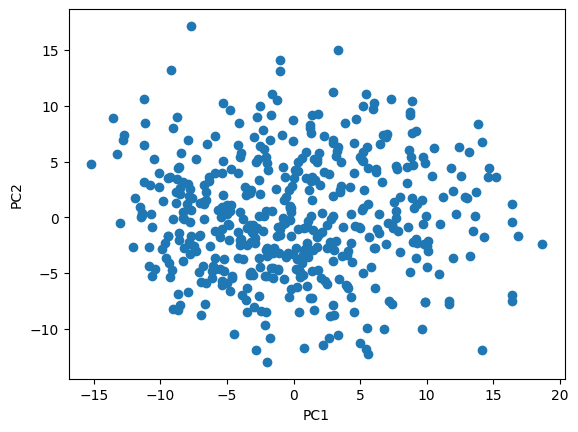

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Best K = 2
best_k = 2
features = X_pca

#BEST K = 3 

# Perform K-means clustering with the optimal K
kmeans = KMeans(n_clusters=best_k, random_state=0)
kmeans.fit(features)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_

BEST K : 2


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


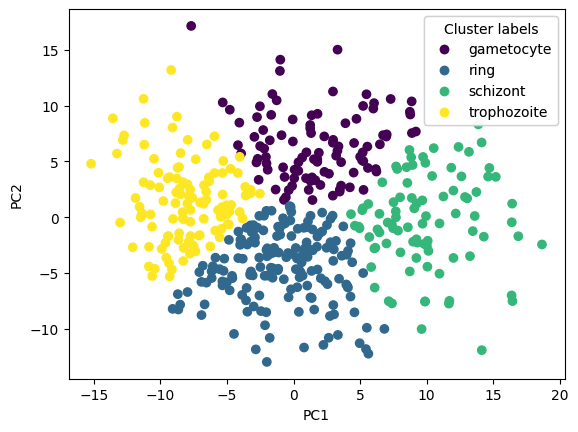

In [ ]:
# Original Clustering 
features = torch.load('/content/drive/MyDrive/Malaria/Only_Infected_feature_vector.pt')

X = features

# Standardization of data 
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# compute the covariance matrix
cov_mat = np.cov(X_std.T)

#compute the eigenvectors and eigenvalues
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# sort the eigenvectors by decreasing eigenvalue
sorted_idx = eig_vals.argsort()[::-1]
eig_vals = eig_vals[sorted_idx]
eig_vecs = eig_vecs[:,sorted_idx]

# choose the number of principal components to retain
n_components = 2

# project the data onto the new subspace
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

best_k = 4
# best_score = -1
features = X_pca

# Perform K-means clustering with the optimal K
kmeans = KMeans(n_clusters=best_k, random_state=0)
kmeans.fit(features)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_

import matplotlib.pyplot as plt

# Get the cluster labels
labels = kmeans.labels_
# print(labels)
cluster_labels = ['gametocyte', 'ring', 'schizont', 'trophozoite']

# Plot the reduced data and color-code the points by their cluster label
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)

handles, labels = scatter.legend_elements()
legend1 = plt.legend(handles, cluster_labels, loc="upper right", title="Cluster labels")
plt.gca().add_artist(legend1)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
from collections import defaultdict

print(len(labels)) # 475
ground_truth = ['gametocyte', 'ring', 'schizont', 'trophozoite']

# Get the cluster labels from the KMeans model
labels = kmeans.labels_

# Create a dictionary to count the number of occurrences of each ground truth label in each cluster
label_counts = defaultdict(lambda: defaultdict(int))

for i, label in enumerate(labels):
    label_counts[label][ground_truth[i % len(ground_truth)]] += 1

# Determine the majority label for each cluster
cluster_majority_labels = []

for cluster_label in sorted(label_counts.keys()):
    cluster_label_counts = label_counts[cluster_label]
    majority_label = max(cluster_label_counts, key=cluster_label_counts.get)
    cluster_majority_labels.append(majority_label)

# Print the cluster majority labels
print("Cluster 0 majority label:", cluster_majority_labels[0])
print("Cluster 1 majority label:", cluster_majority_labels[1])

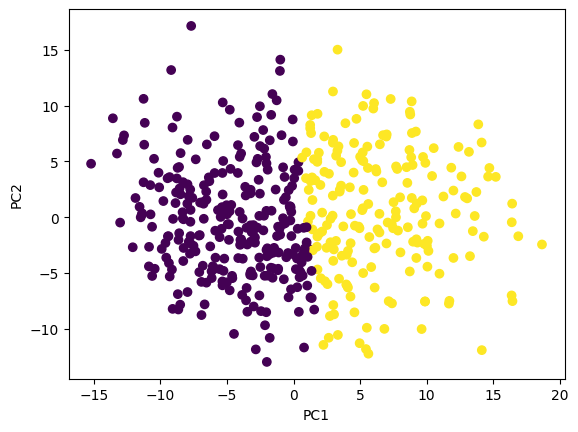

In [ ]:
import matplotlib.pyplot as plt

# Get the cluster labels
# Plot the reduced data and color-code the points by their cluster label
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Knowledge Distillation

Relational Subsets : {gametocyte, schizont}, {trophozoite, ring}, {Healthy}

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset,random_split 
from torchvision import datasets, transforms
import torchvision.models as models
import shutil

In [9]:
NUM_WORKERS = 2

# Define the transforms to apply to each image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

dataset = datasets.ImageFolder(root='/content/drive/MyDrive/Malaria/Infected', transform=transform)

# Split the dataset into training and testing sets
train_size = int(0.7 * len(dataset))
test_size = int(0.2 * len(dataset))
valid_size = len(dataset) - train_size - test_size

train_dataset, test_dataset,valid_dataset = torch.utils.data.random_split(dataset, [train_size, test_size,valid_size])

# Create dataloaders for the training and testing sets
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

Teachermodel is DenseNet , Student model is ResNet18

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Define the teacher model (DenseNet121)
class TeacherModel(nn.Module):
    def __init__(self, num_classes):
        super(TeacherModel, self).__init__()
        self.model = models.densenet121(pretrained=True)
        self.model.classifier = nn.Linear(self.model.classifier.in_features, num_classes)

    def forward(self, x):
        x = self.model(x)
        return x

# Define the student model (ResNet18)
class StudentModel(nn.Module):
    def __init__(self, num_classes):
        super(StudentModel, self).__init__()
        self.model = models.resnet18(pretrained=True)
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)

    def forward(self, x):
        x = self.model(x)
        return x

# Define the distillation loss function
class DistillationLoss(nn.Module):
    def __init__(self, temperature):
        super(DistillationLoss, self).__init__()
        self.temperature = temperature
        self.cross_entropy = nn.CrossEntropyLoss()

    def forward(self, student_logits, teacher_logits, labels):
        soft_labels = nn.functional.softmax(teacher_logits / self.temperature, dim=1)
        return nn.functional.kl_div(nn.functional.log_softmax(student_logits / self.temperature, dim=1), soft_labels, reduction='batchmean') * (self.temperature ** 2) + self.cross_entropy(student_logits, labels) * (1 - self.temperature ** 2)



In [11]:
# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the hyperparameters
num_classes = 5
batch_size = 32
learning_rate = 0.001
num_epochs = 10
temperature = 4.0

# Initialize the teacher model
teacher_model = TeacherModel(num_classes=num_classes).to(device)

# Define the loss function and optimizer for the teacher model
criterion_teacher = nn.CrossEntropyLoss()
optimizer_teacher = optim.Adam(teacher_model.parameters(), lr=learning_rate)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import matplotlib.pyplot as plt

train_losses = []
train_accs = []
val_losses = []
val_accs = []

# Train the teacher model
for epoch in range(num_epochs):
    print("EPOCH", epoch)
    running_loss = 0.0
    running_corrects = 0
    teacher_model.train()
    for i, data in enumerate(train_dataloader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer_teacher.zero_grad()

        # Forward + backward + optimize
        outputs = teacher_model(inputs)
        loss = criterion_teacher(outputs, labels)
        loss.backward()
        optimizer_teacher.step()

        # Calculate training accuracy
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)

        # Print statistics
        running_loss += loss.item() * inputs.size(0)

    # Calculate training accuracy and loss
    train_loss = running_loss / len(train_dataloader.dataset)
    train_acc = running_corrects.double() / len(train_dataloader.dataset)
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    # Evaluate the teacher model on the validation set
    teacher_model.eval() # set model to evaluation mode
    running_loss = 0.0
    running_corrects = 0
    with torch.no_grad():
        for data in valid_dataloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = teacher_model(inputs)
            loss = criterion_teacher(outputs, labels)

            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

    # Calculate validation accuracy and loss

    val_loss = running_loss / len(valid_dataloader.dataset)
    val_acc = running_corrects.double() / len(valid_dataloader.dataset)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    print("VAL ACC",val_acc)

    print('[Epoch %d] Train Loss: %.4f Train Acc: %.4f Val Loss: %.4f Val Acc: %.4f' % 
          (epoch+1, train_loss, train_acc, val_loss, val_acc))
    torch.save(teacher_model.state_dict(), 'teacher_model.pth')


In [35]:
train_acc_list = [tensor.cpu().numpy().tolist() for tensor in train_accs]
val_acc_list = [tensor.cpu().numpy().tolist() for tensor in val_accs]

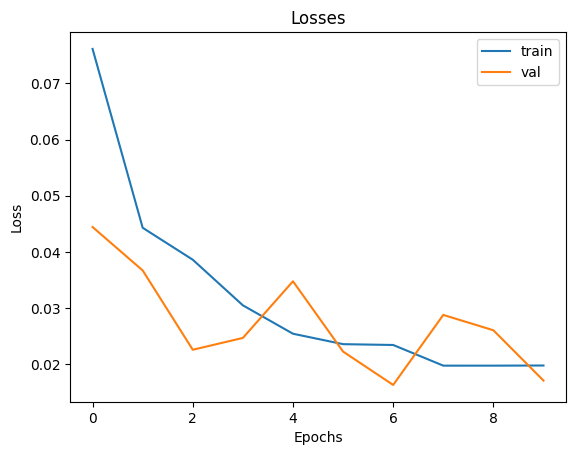

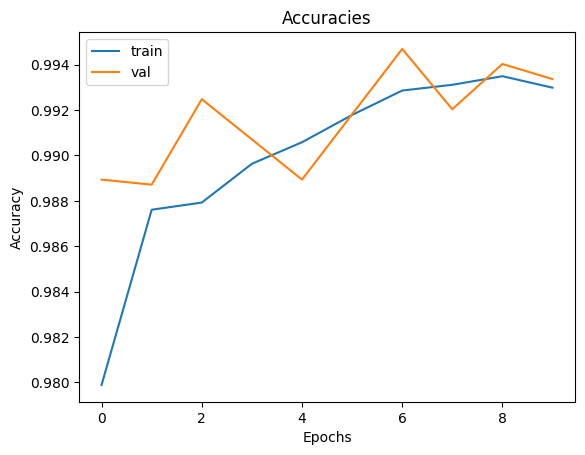

In [36]:
# Plot the training and validation losses
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.title('Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracies
plt.plot(train_acc_list, label='train')
plt.plot(val_acc_list, label='val')
plt.title('Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
print(sum(train_losses) / 10)
print(sum(val_losses) / 10)

print(sum(train_acc_list) / 10)
print(sum(val_acc_list) / 10)

0.03215188848816975
0.02739917524931389
0.9899841922225734
0.9915670650730413


In [13]:
# Initialize the student model
student_model = StudentModel(num_classes=5).to('cuda:0')

# Define the loss function and optimizer for the student model
criterion_student = DistillationLoss(temperature=temperature)
optimizer_student = optim.Adam(student_model.parameters(), lr=learning_rate)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [14]:

train_losses = []
train_accs = []
val_losses = []
val_accs = []

# Train the student model
# Initialize the student model
student_model = StudentModel(num_classes=5).to('cuda:0')

# Define the loss function and optimizer for the student model
criterion = nn.KLDivLoss(reduction='batchmean')
optimizer = optim.Adam(student_model.parameters(), lr=0.001)

teacher_model = TeacherModel(num_classes=5).to('cuda:0')
# Load the saved teacher model
saved_model_path = "/content/drive/MyDrive/Malaria/teacher_model.pth"  # example path, change it to your saved model's path
state_dict = torch.load(saved_model_path)

# Load the state dictionary into the teacher model
teacher_model.load_state_dict(state_dict)

teacher_model.eval()

best_val_acc = 0.0
best_weights = None
T = 10 

In [ ]:
student_model.to('cuda:0')

# Train the student model
for epoch in range(num_epochs):
    print("EPOCH",epoch)
    student_model.train()
    running_loss = 0.0
    running_corrects = 0
    for i, data in enumerate(train_dataloader):
        print(i)
        inputs, labels = data
        inputs, labels = inputs.to('cuda:0'), labels.to('cuda:0')

        # Zero the parameter gradients
        optimizer.zero_grad()

        student_outputs = student_model(inputs)
        teacher_outputs = teacher_model(inputs)

        loss = criterion(nn.functional.log_softmax(student_outputs/T, dim=1),
                         nn.functional.softmax(teacher_outputs/T, dim=1)) * T * T
        loss.backward()
        optimizer.step()
        _, preds = torch.max(student_outputs, 1)
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)

    train_loss = running_loss / len(train_dataloader.dataset)
    train_acc = running_corrects.double() / len(train_dataloader.dataset)
    train_losses.append(train_loss)
    train_accs.append(train_acc)


    # Evaluate the student model on the validation set
    student_model.eval()
    running_loss = 0.0
    running_corrects = 0

    num_correct = 0
    num_total = 0
    with torch.no_grad():
        for i,data in enumerate(valid_dataloader):
            print("valid",i)
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = student_model(inputs)
            loss = criterion(nn.functional.log_softmax(outputs/T, dim=1),
                         nn.functional.softmax(teacher_model(inputs)/T, dim=1)) * T * T

            
            # student_outputs = student_model(inputs)
            _, preds = torch.max(student_outputs, 1)
            running_loss += loss.item() 
            running_corrects += torch.sum(preds == labels.data)


    val_loss = running_loss / len(valid_dataloader.dataset)
    val_acc = running_corrects.double() / len(valid_dataloader.dataset)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print('[Epoch %d] Train Loss: %.4f Train Acc: %.4f Val Loss: %.4f Val Acc: %.4f' % (epoch+1, train_loss, train_acc, val_loss, val_acc))

    # Save the model weights if the validation accuracy is the best so far
    if val_acc > best_val_acc:
      best_val_acc = val_acc
      best_weights = student_model.state_dict()
      torch.save(best_weights, 'best_student_model.pth')

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss and accuracy curves
plt.plot(train_losses, label='train loss')
plt.plot(val_losses, label='val loss')
plt.legend()
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(train_accs, label='train accuracy')
plt.plot(val_accs, label='val accuracy')
plt.legend()
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()